In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arplusman/papers-by-subject")

print("Path to dataset files:", path)

100%|██████████| 17.3M/17.3M [00:01<00:00, 9.77MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/arplusman/papers-by-subject/versions/3


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("/root/.cache/kagglehub/datasets/arplusman/papers-by-subject/versions/3/arXiv-DataFrame.csv")



In [3]:
df.head()

,Unnamed: 0,id,Title,Summary,Author,Link,Publish Date,Update Date,Primary Category,Category
0,0,cs/9308101v1,Dynamic Backtracking,Because of their occasional need to return to ...,M. L. Ginsberg,http://arxiv.org/pdf/cs/9308101v1,1993-08-01T00:00:00Z,1993-08-01T00:00:00Z,cs.AI,['cs.AI']
1,1,cs/9308102v1,A Market-Oriented Programming Environment and ...,Market price systems constitute a well-underst...,M. P. Wellman,http://arxiv.org/pdf/cs/9308102v1,1993-08-01T00:00:00Z,1993-08-01T00:00:00Z,cs.AI,['cs.AI']
2,2,cs/9309101v1,An Empirical Analysis of Search in GSAT,We describe an extensive study of search in GS...,I. P. Gent,http://arxiv.org/pdf/cs/9309101v1,1993-09-01T00:00:00Z,1993-09-01T00:00:00Z,cs.AI,['cs.AI']
3,3,cs/9311101v1,The Difficulties of Learning Logic Programs wi...,As real logic programmers normally use cut (!)...,F. Bergadano,http://arxiv.org/pdf/cs/9311101v1,1993-11-01T00:00:00Z,1993-11-01T00:00:00Z,cs.AI,['cs.AI']
4,4,cs/9311102v1,Software Agents: Completing Patterns and Const...,To support the goal of allowing users to recor...,J. C. Schlimmer,http://arxiv.org/pdf/cs/9311102v1,1993-11-01T00:00:00Z,1993-11-01T00:00:00Z,cs.AI,['cs.AI']


# Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53474 entries, 0 to 53473
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        53474 non-null  int64 
 1   id                53474 non-null  object
 2   Title             53474 non-null  object
 3   Summary           53474 non-null  object
 4   Author            53474 non-null  object
 5   Link              53474 non-null  object
 6   Publish Date      53474 non-null  object
 7   Update Date       53474 non-null  object
 8   Primary Category  53474 non-null  object
 9   Category          53474 non-null  object
dtypes: int64(1), object(9)
memory usage: 4.1+ MB


In [5]:
df.describe()

,Unnamed: 0
count,53474.000000
mean,26736.500000
std,15436.758484
min,0.000000
25%,13368.250000
50%,26736.500000
75%,40104.750000
max,53473.000000


In [6]:
df['Primary Category'].unique()

array(['cs.AI', 'cs.AR', 'cs.CC', 'cs.CE', 'cs.CG', 'cs.CL', 'cs.CR',
       'cs.CV', 'cs.CY', 'cs.DB', 'cs.DC', 'cs.DL', 'cs.DM', 'cs.DS',
       'cs.ET', 'cs.FL', 'cs.GL', 'cond-mat.dis-nn', 'cs.LO', 'cs.SE',
       'cs.MA', 'cs.NE', 'cs.OS', 'quant-ph', 'q-fin.TR', 'math.HO',
       'math.LO', 'stat.OT', 'cs.IR', 'cs.HC', 'cs.NI', 'cs.SI',
       'physics.soc-ph', 'physics.ins-det', 'math.ST', 'nlin.AO',
       'physics.ed-ph', 'cond-mat.stat-mech', 'physics.optics', 'cs.LG',
       'q-bio.GN', 'math-ph', 'cs.SD', 'cs.GR', 'cs.GT', 'cs.IT', 'cs.MM',
       'cs.MS', 'cs.SC', 'cs.NA', 'cs.OH', 'cs.PF', 'cs.PL', 'cs.SY',
       'cs.RO', 'econ.EM', 'econ.GN', 'q-fin.EC', 'econ.TH', 'eess.AS',
       'eess.IV', 'eess.SP', 'eess.SY', 'math.AC', 'math.AG', 'math.AP',
       'math.AT', 'math.CA', 'math.CO', 'math.CT', 'math.CV', 'math.DG',
       'math.DS', 'math.FA', 'math.GM', 'math.GN', 'math.GR', 'math.GT',
       'math.KT', 'math.MG', 'math.NA', 'math.NT', 'math.OA', 'math.OC',
       

In [7]:
df = df.drop_duplicates()

In [8]:
df.fillna(0, inplace=True)

In [9]:
# Encode categories
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['Primary Category'])

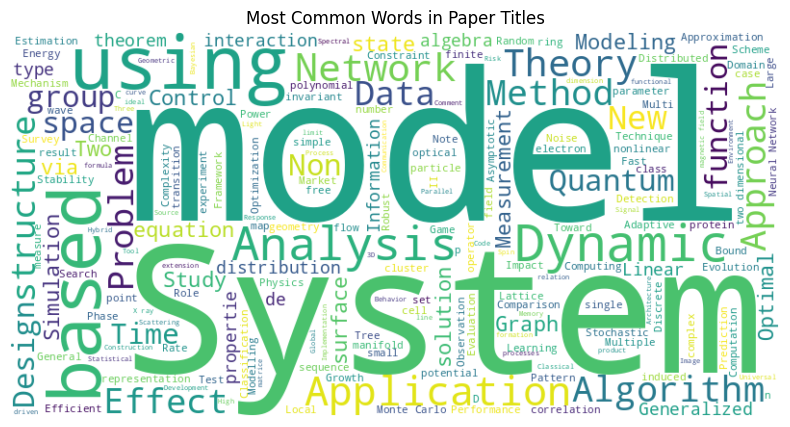

In [10]:

text = " ".join(title for title in df['Title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Paper Titles")
plt.show()


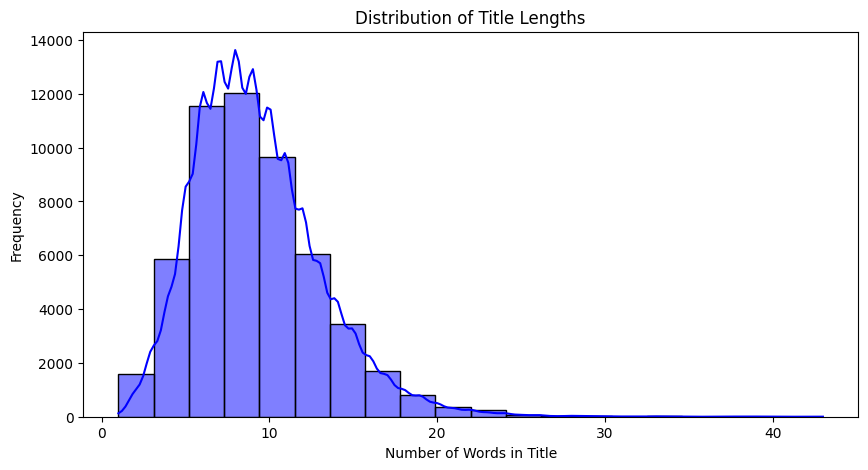

In [11]:
df['title_length'] = df['Title'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 5))
sns.histplot(df['title_length'], bins=20, kde=True, color='blue')
plt.xlabel("Number of Words in Title")
plt.ylabel("Frequency")
plt.title("Distribution of Title Lengths")
plt.show()


In [12]:
action_size = df['category_encoded'].nunique()


# Multi-Agent Deep-Q-Network Model

In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from collections import deque
import random

class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=5000)  # Increased memory buffer
        self.gamma = 0.95  # Discount factor
        self.epsilon = 1.0  # Exploration rate
        self.epsilon_min = 0.01  # Minimum exploration rate
        self.epsilon_decay = 0.98  # Faster decay rate
        self.learning_rate = 0.001
        self.model = self._build_model()

    def _build_model(self):
        model = Sequential([
            Input(shape=(self.state_size,)),
            Dense(256, activation='relu'),  # capture complex patterns from the input features.
            Dense(128, activation='relu'),  # refines the learned representations by extracting meaningful features while reducing dimensionality.
            Dense(64, activation='relu'),   # Further reduces the feature complexity and ensures that only the most useful information is retained before the final decision
            Dense(self.action_size, activation='softmax')  # Output layer
        ])
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=self.learning_rate),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        q_values = self.model.predict(np.array([state]), verbose=0)
        return np.argmax(q_values[0])

    def replay(self, batch_size):
        if len(self.memory) < batch_size:
            return
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = reward + self.gamma * np.max(self.model.predict(np.array([next_state]), verbose=0)[0])
            target_f = self.model.predict(np.array([state]), verbose=0)
            target_f[0][action] = target
            self.model.fit(np.array([state]), target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay


#Training Multi-Agent DQN Model

In [14]:
num_agents = 3  # Define multiple agents
agents = [DQNAgent(100, action_size) for _ in range(num_agents)]  # Assuming state_size = 100
num_episodes = 100  # episodes
batch_size = 32
y_true, y_pred = [], []

for episode in range(num_episodes):
    for agent in agents:
        state = np.random.rand(100)  # Random state representation
        total_reward = 0
        done = False
        while not done:
            action = agent.act(state)
            next_state = np.random.rand(100)
            reward = 1 if action % 2 == 0 else -1
            done = np.random.rand() < 0.1
            agent.remember(state, action, reward, next_state, done)
            state = next_state
            total_reward += reward
            y_true.append(action)
            y_pred.append(agent.act(state))
        agent.replay(batch_size * 3)  # More training per episode
    print(f"Episode {episode + 1}: Total Reward = {total_reward}, Epsilon = {agent.epsilon:.4f}")

Episode 1: Total Reward = -10, Epsilon = 1.0000
Episode 2: Total Reward = -2, Epsilon = 1.0000
Episode 3: Total Reward = 1, Epsilon = 1.0000
Episode 4: Total Reward = 5, Epsilon = 1.0000
Episode 5: Total Reward = -1, Epsilon = 1.0000
Episode 6: Total Reward = -1, Epsilon = 1.0000
Episode 7: Total Reward = -2, Epsilon = 1.0000
Episode 8: Total Reward = 1, Epsilon = 1.0000
Episode 9: Total Reward = 0, Epsilon = 1.0000
Episode 10: Total Reward = -1, Epsilon = 0.9800
Episode 11: Total Reward = 8, Epsilon = 0.9604
Episode 12: Total Reward = -2, Epsilon = 0.9412
Episode 13: Total Reward = 1, Epsilon = 0.9224
Episode 14: Total Reward = 0, Epsilon = 0.9039
Episode 15: Total Reward = 0, Epsilon = 0.8858
Episode 16: Total Reward = -1, Epsilon = 0.8681
Episode 17: Total Reward = -7, Epsilon = 0.8508
Episode 18: Total Reward = 1, Epsilon = 0.8337
Episode 19: Total Reward = 1, Epsilon = 0.8171
Episode 20: Total Reward = -3, Epsilon = 0.8007
Episode 21: Total Reward = 0, Epsilon = 0.7847
Episode 22:

In [17]:
agents[0].model.save_weights("dqn_model.weights.h5")

In [19]:
episodes1 = list(range(1, 101))
total_rewards1 = [-10, -2, 1, 5, -1, -1, -2, 1, 0, -1, 8, -2, 1, 0, 0, -1, -7, 1, 1, -3, 0, 3, 5, 5, 0, -4, -1, 2, 0, 4, 3, 8, 15, 7, 1, 0, 5, 4, 6, 1, 1, 2, 7, 4, 6, 4, 2, 3, 12, 3, 2, 9, 4, 11, 14, 3, 4, 4, 6, 11, 1, 14, 2, 6, 2, 9, 9, 3, 3, 3, 21, 7, 1, 0, 6, 15, 9, 5, 3, 11, 5, 1, 11, 7, 9, 7, 3, 5, 10, 2, 6, 2, 3, 12, 13, 11, 6, 5, 5, 17]
epsilon_values1 = [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9800, 0.9604, 0.9412, 0.9224, 0.9039, 0.8858, 0.8681, 0.8508, 0.8337, 0.8171, 0.8007, 0.7847, 0.7690, 0.7536, 0.7386, 0.7238, 0.7093, 0.6951, 0.6812, 0.6676, 0.6543, 0.6412, 0.6283, 0.6158, 0.6035, 0.5914, 0.5796, 0.5680, 0.5566, 0.5455, 0.5346, 0.5239, 0.5134, 0.5031, 0.4931, 0.4832, 0.4735, 0.4641, 0.4548, 0.4457, 0.4368, 0.4281, 0.4195, 0.4111, 0.4029, 0.3948, 0.3869, 0.3792, 0.3716, 0.3642, 0.3569, 0.3497, 0.3428, 0.3359, 0.3292, 0.3226, 0.3161, 0.3098, 0.3036, 0.2976, 0.2916, 0.2858, 0.2801, 0.2745, 0.2690, 0.2636, 0.2583, 0.2531, 0.2481, 0.2431, 0.2383, 0.2335, 0.2288, 0.2242, 0.2198, 0.2154, 0.2111, 0.2068, 0.2027, 0.1986, 0.1947, 0.1908, 0.1870, 0.1832, 0.1796, 0.1760, 0.1725, 0.1690, 0.1656, 0.1623, 0.1591]


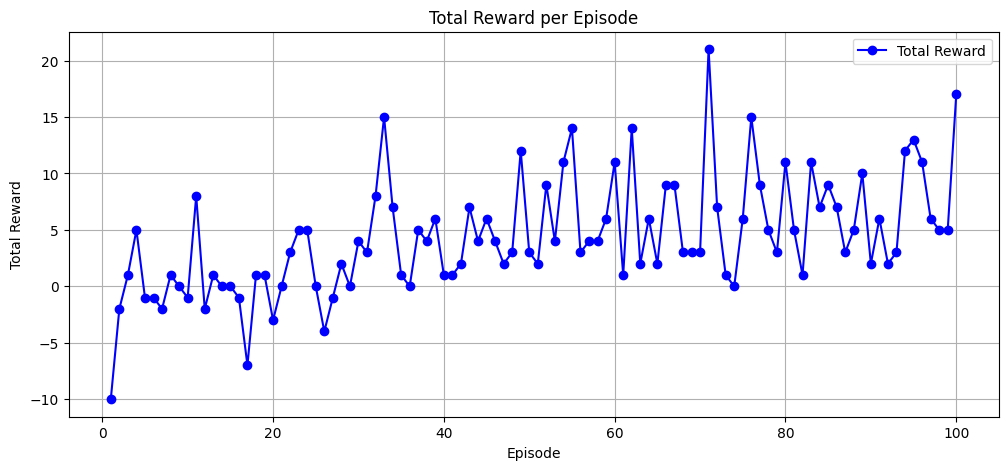

In [25]:
# Total Rewards per Episode
plt.figure(figsize=(12, 5))
plt.plot(episodes1, total_rewards1, marker='o', linestyle='-', color='b', label='Total Reward')
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Total Reward per Episode")
plt.legend()
plt.grid()
plt.show()


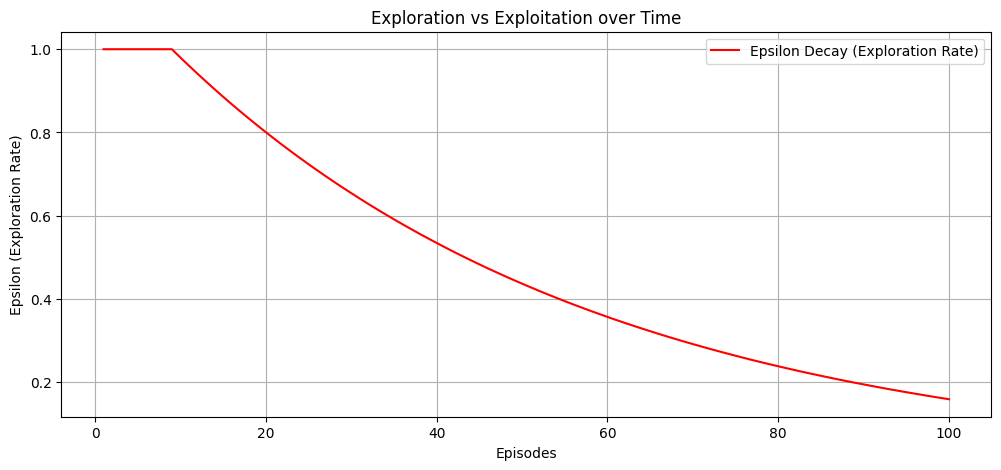

In [29]:
# Calculate moving average for rewards
window_size = 10
average_rewards = np.convolve(total_rewards1, np.ones(window_size)/window_size, mode='valid')


#  Epsilon Decay (Exploration vs Exploitation)
plt.figure(figsize=(12, 5))
plt.plot(episodes1, epsilon_values1, label="Epsilon Decay (Exploration Rate)", color='red')
plt.xlabel("Episodes")
plt.ylabel("Epsilon (Exploration Rate)")
plt.title("Exploration vs Exploitation over Time")
plt.legend()
plt.grid(True)
plt.show()



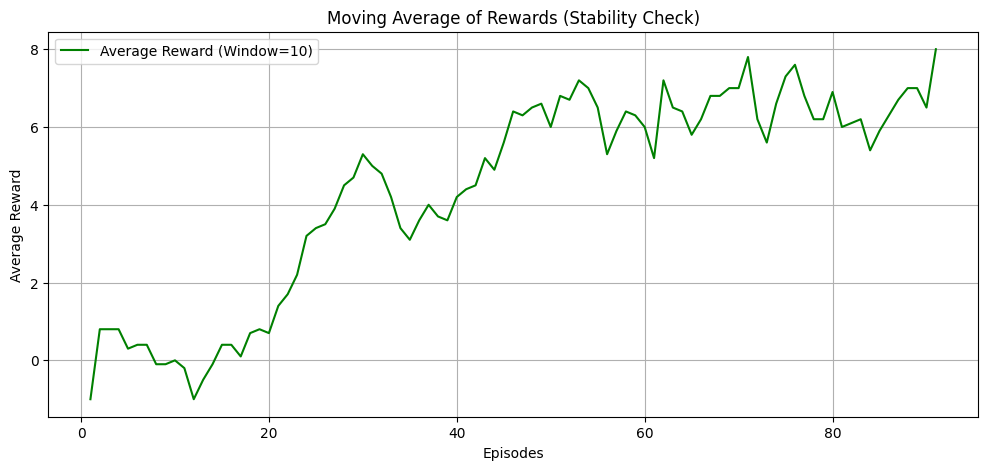

In [28]:
#  Average Reward per 10 Episodes
plt.figure(figsize=(12, 5))
plt.plot(episodes1[:len(average_rewards)], average_rewards, label="Average Reward (Window=10)", color='green')
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.title("Moving Average of Rewards (Stability Check)")
plt.legend()
plt.grid(True)
plt.show()

In [30]:

# Print values
print("===== Numerical Results =====")
print(f"Total Episodes: {len(episodes1)}")

# Rewards per episode
print("\nTotal Rewards per Episode:")
for i in range(len(total_rewards1)):
    print(f"Episode {i+1}: Reward = {total_rewards1[i]}")

# Epsilon values per episode
print("\nEpsilon (Exploration Rate) per Episode:")
for i in range(len(epsilon_values1)):
    print(f"Episode {i+1}: Epsilon = {epsilon_values1[i]:.4f}")

# Moving average of rewards (for stability check)
print("\nMoving Average of Rewards (Window=10):")
for i in range(len(average_rewards)):
    print(f"Episode {i+1} to {i+10}: Avg Reward = {average_rewards[i]:.2f}")

===== Numerical Results =====
Total Episodes: 100

Total Rewards per Episode:
Episode 1: Reward = -10
Episode 2: Reward = -2
Episode 3: Reward = 1
Episode 4: Reward = 5
Episode 5: Reward = -1
Episode 6: Reward = -1
Episode 7: Reward = -2
Episode 8: Reward = 1
Episode 9: Reward = 0
Episode 10: Reward = -1
Episode 11: Reward = 8
Episode 12: Reward = -2
Episode 13: Reward = 1
Episode 14: Reward = 0
Episode 15: Reward = 0
Episode 16: Reward = -1
Episode 17: Reward = -7
Episode 18: Reward = 1
Episode 19: Reward = 1
Episode 20: Reward = -3
Episode 21: Reward = 0
Episode 22: Reward = 3
Episode 23: Reward = 5
Episode 24: Reward = 5
Episode 25: Reward = 0
Episode 26: Reward = -4
Episode 27: Reward = -1
Episode 28: Reward = 2
Episode 29: Reward = 0
Episode 30: Reward = 4
Episode 31: Reward = 3
Episode 32: Reward = 8
Episode 33: Reward = 15
Episode 34: Reward = 7
Episode 35: Reward = 1
Episode 36: Reward = 0
Episode 37: Reward = 5
Episode 38: Reward = 4
Episode 39: Reward = 6
Episode 40: Reward =

In [31]:
# Summary Statistics
print("\n===== Summary Statistics =====")
print(f"Final Epsilon (Exploration Rate): {epsilon_values1[-1]:.4f}")
print(f"Highest Reward Achieved: {max(total_rewards1)}")
print(f"Lowest Reward Achieved: {min(total_rewards1)}")
print(f"Average Reward Across Episodes: {np.mean(total_rewards1):.2f}")
print(f"Final Moving Average Reward: {average_rewards[-1]:.2f}")


===== Summary Statistics =====
Final Epsilon (Exploration Rate): 0.1591
Highest Reward Achieved: 21
Lowest Reward Achieved: -10
Average Reward Across Episodes: 4.34
Final Moving Average Reward: 8.00
